In [27]:
#importar bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sn
import matplotlib.pyplot as plt




In [2]:
#uploaded = files.upload()

In [17]:
dataset = pd.read_csv("diabetes-2.csv", encoding="utf-8")


In [18]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
valores_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

def revisar_los_valores_zero(data, fields):

    for field in fields:
        print('Campos %s: con entradas en 0: %d' % (field, len(data.loc[ data[field] == 0, field ])))

revisar_los_valores_zero(dataset, valores_zero)

Campos Glucose: con entradas en 0: 5
Campos BloodPressure: con entradas en 0: 35
Campos SkinThickness: con entradas en 0: 227
Campos Insulin: con entradas en 0: 374
Campos BMI: con entradas en 0: 11


In [20]:
features = list(dataset.columns.values)
features.remove('Outcome')
print(features)
X = dataset[features]
y = dataset['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print("Longitud de entrenamiento" , X_train.shape)
print("Longitud de prueba" , X_test.shape)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Longitud de entrenamiento (576, 8)
Longitud de prueba (192, 8)


Vamos a llenar con valores 0 los campos que lo tiene, con la media

In [21]:
def rellenar_valores_zeros(data, field):
    nonzero_vals = data.loc[data[field] != 0, field]
    avg = np.sum(nonzero_vals) / len(nonzero_vals)
    k = len(data.loc[ data[field] == 0, field])
    data.loc[ data[field] == 0, field ] = avg
    print('En el campo: %s;  fueron actualizadas %d entradas con el valor: %.3f' % (field, k, avg))

In [22]:
# Fix it for Train dataset
for campo in valores_zero:
    rellenar_valores_zeros(X_train, campo)

En el campo: Glucose;  fueron actualizadas 4 entradas con el valor: 122.003
En el campo: BloodPressure;  fueron actualizadas 25 entradas con el valor: 72.846
En el campo: SkinThickness;  fueron actualizadas 163 entradas con el valor: 29.465
En el campo: Insulin;  fueron actualizadas 270 entradas con el valor: 158.464
En el campo: BMI;  fueron actualizadas 8 entradas con el valor: 32.663


In [23]:
for campo in valores_zero:
    rellenar_valores_zeros(X_test, campo)

En el campo: Glucose;  fueron actualizadas 1 entradas con el valor: 120.738
En el campo: BloodPressure;  fueron actualizadas 10 entradas con el valor: 71.071
En el campo: SkinThickness;  fueron actualizadas 64 entradas con el valor: 28.148
En el campo: Insulin;  fueron actualizadas 104 entradas con el valor: 145.409
En el campo: BMI;  fueron actualizadas 3 entradas con el valor: 31.841


Dejamos solo los valores, y no los nombres de la columna

In [24]:
X_train = X_train.values
y_train = y_train.values
X_test  = X_test.values
y_test  = y_test.values

6/6 [==============================] - 0s 1ms/step

Resultados con adagrad:
Precisión: 64.06%
Precisión Positiva (Precision): 0.4507
Sensibilidad (Recall): 0.5161
Puntuación F1: 0.4812


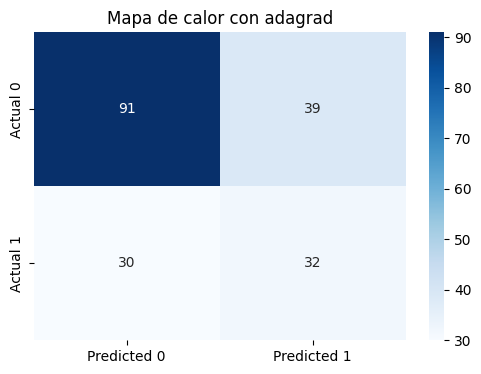

6/6 [==============================] - 0s 800us/step

Resultados con adadelta:
Precisión: 67.19%
Precisión Positiva (Precision): 0.0000
Sensibilidad (Recall): 0.0000
Puntuación F1: 0.0000


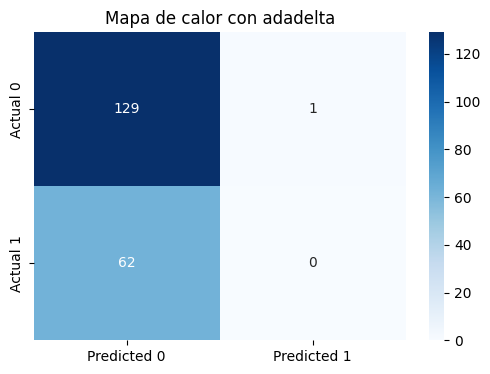

6/6 [==============================] - 0s 800us/step

Resultados con rmsprop:
Precisión: 75.00%
Precisión Positiva (Precision): 0.6167
Sensibilidad (Recall): 0.5968
Puntuación F1: 0.6066


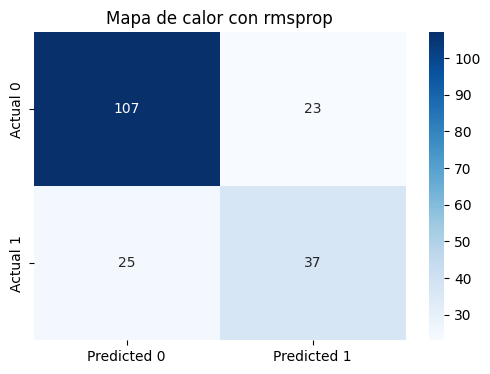

6/6 [==============================] - 0s 800us/step

Resultados con adamax:
Precisión: 75.52%
Precisión Positiva (Precision): 0.6667
Sensibilidad (Recall): 0.4839
Puntuación F1: 0.5607


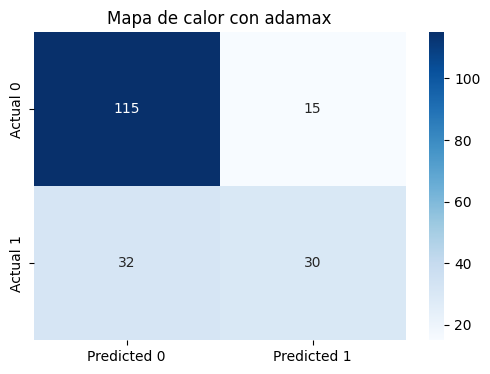

6/6 [==============================] - 0s 1000us/step

Resultados con nadam:
Precisión: 75.52%
Precisión Positiva (Precision): 0.6667
Sensibilidad (Recall): 0.4839
Puntuación F1: 0.5607


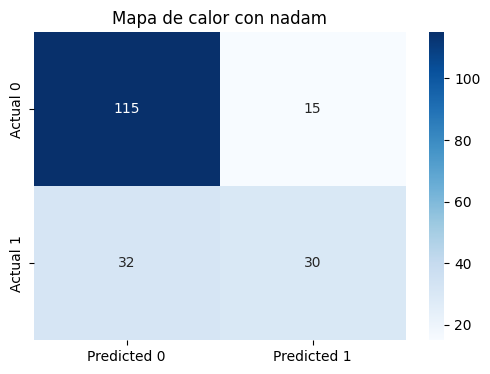

6/6 [==============================] - 0s 1ms/step

Resultados con sgd:
Precisión: 69.79%
Precisión Positiva (Precision): 0.5294
Sensibilidad (Recall): 0.5806
Puntuación F1: 0.5538


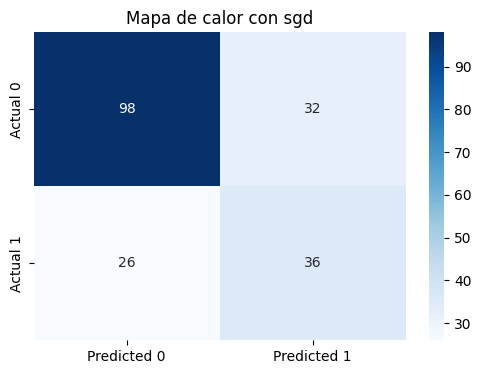

6/6 [==============================] - 0s 1000us/step

Resultados con sgd_momentum:
Precisión: 67.71%
Precisión Positiva (Precision): 0.0000
Sensibilidad (Recall): 0.0000
Puntuación F1: 0.0000


c:\Users\Adolfo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


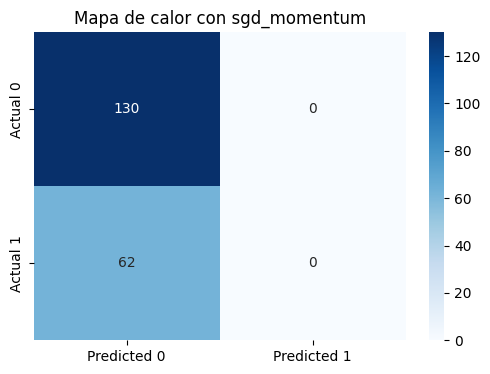

6/6 [==============================] - 0s 999us/step

Resultados con adam:
Precisión: 73.96%
Precisión Positiva (Precision): 0.5769
Sensibilidad (Recall): 0.7258
Puntuación F1: 0.6429


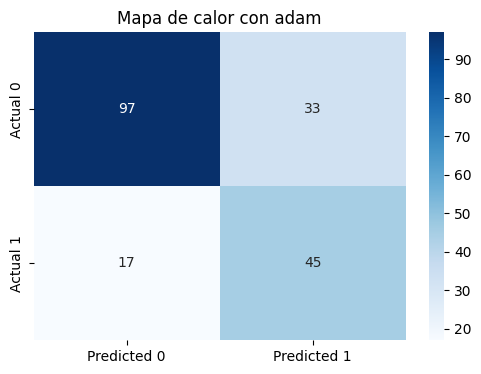

In [28]:
 
from keras.optimizers import SGD

 
optimizers = ['adagrad', 'adadelta', 'rmsprop', 'adamax', 'nadam', 'sgd', 'sgd_momentum', 'adam']

for optimizer in optimizers:
    model = Sequential()
    model.add(Dense(32, activation='relu', input_dim=8))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    if optimizer == 'sgd_momentum':
        # SGD con momentum
        optimizer_instance = SGD(momentum=0.9)
    else:
        optimizer_instance = optimizer
    
    model.compile(optimizer=optimizer_instance, loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=250, verbose=0)  # verbose=0 para no imprimir en cada época

    y_pred = (model.predict(X_test) > 0.5).astype(int)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\nResultados con {optimizer}:")
    print(f"Precisión: {acc * 100:.2f}%")
    print(f"Precisión Positiva (Precision): {precision:.4f}")
    print(f"Sensibilidad (Recall): {recall:.4f}")
    print(f"Puntuación F1: {f1:.4f}")


    mapa_calor = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 4))
    sn.heatmap(mapa_calor, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'],
               yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Mapa de calor con {optimizer}')
    plt.show()

